In [50]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [52]:
# Load the dataset
url = 'diabetes.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

In [54]:
# Data Exploration
print("First 5 rows of the dataset:")
print(data.head())

print("\nSummary statistics:")
print(data.describe())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   
4            1       89             66             23       94  28.1   

   DiabetesPedigreeFunction  Age  Outcome  
0  DiabetesPedigreeFunction  Age  Outcome  
1                     0.627   50        1  
2                     0.351   31        0  
3                     0.672   32        1  
4                     0.167   21        0  

Summary statistics:
       Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI  \
count          769     769           769           769     769  769   
unique          18     137            48            52     187  249   
top              1     100            70

In [74]:
# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [78]:
# Convert columns to numeric if necessary
data['Pregnancies'] = pd.to_numeric(data['Pregnancies'], errors='coerce')
data['Glucose'] = pd.to_numeric(data['Glucose'], errors='coerce')
data['BloodPressure'] = pd.to_numeric(data['BloodPressure'], errors='coerce')
data['SkinThickness'] = pd.to_numeric(data['SkinThickness'], errors='coerce')
data['Insulin'] = pd.to_numeric(data['Insulin'], errors='coerce')
data['BMI'] = pd.to_numeric(data['BMI'], errors='coerce')
data['DiabetesPedigreeFunction'] = pd.to_numeric(data['DiabetesPedigreeFunction'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Outcome'] = pd.to_numeric(data['Outcome'], errors='coerce')


In [80]:
data.dropna(inplace=True)

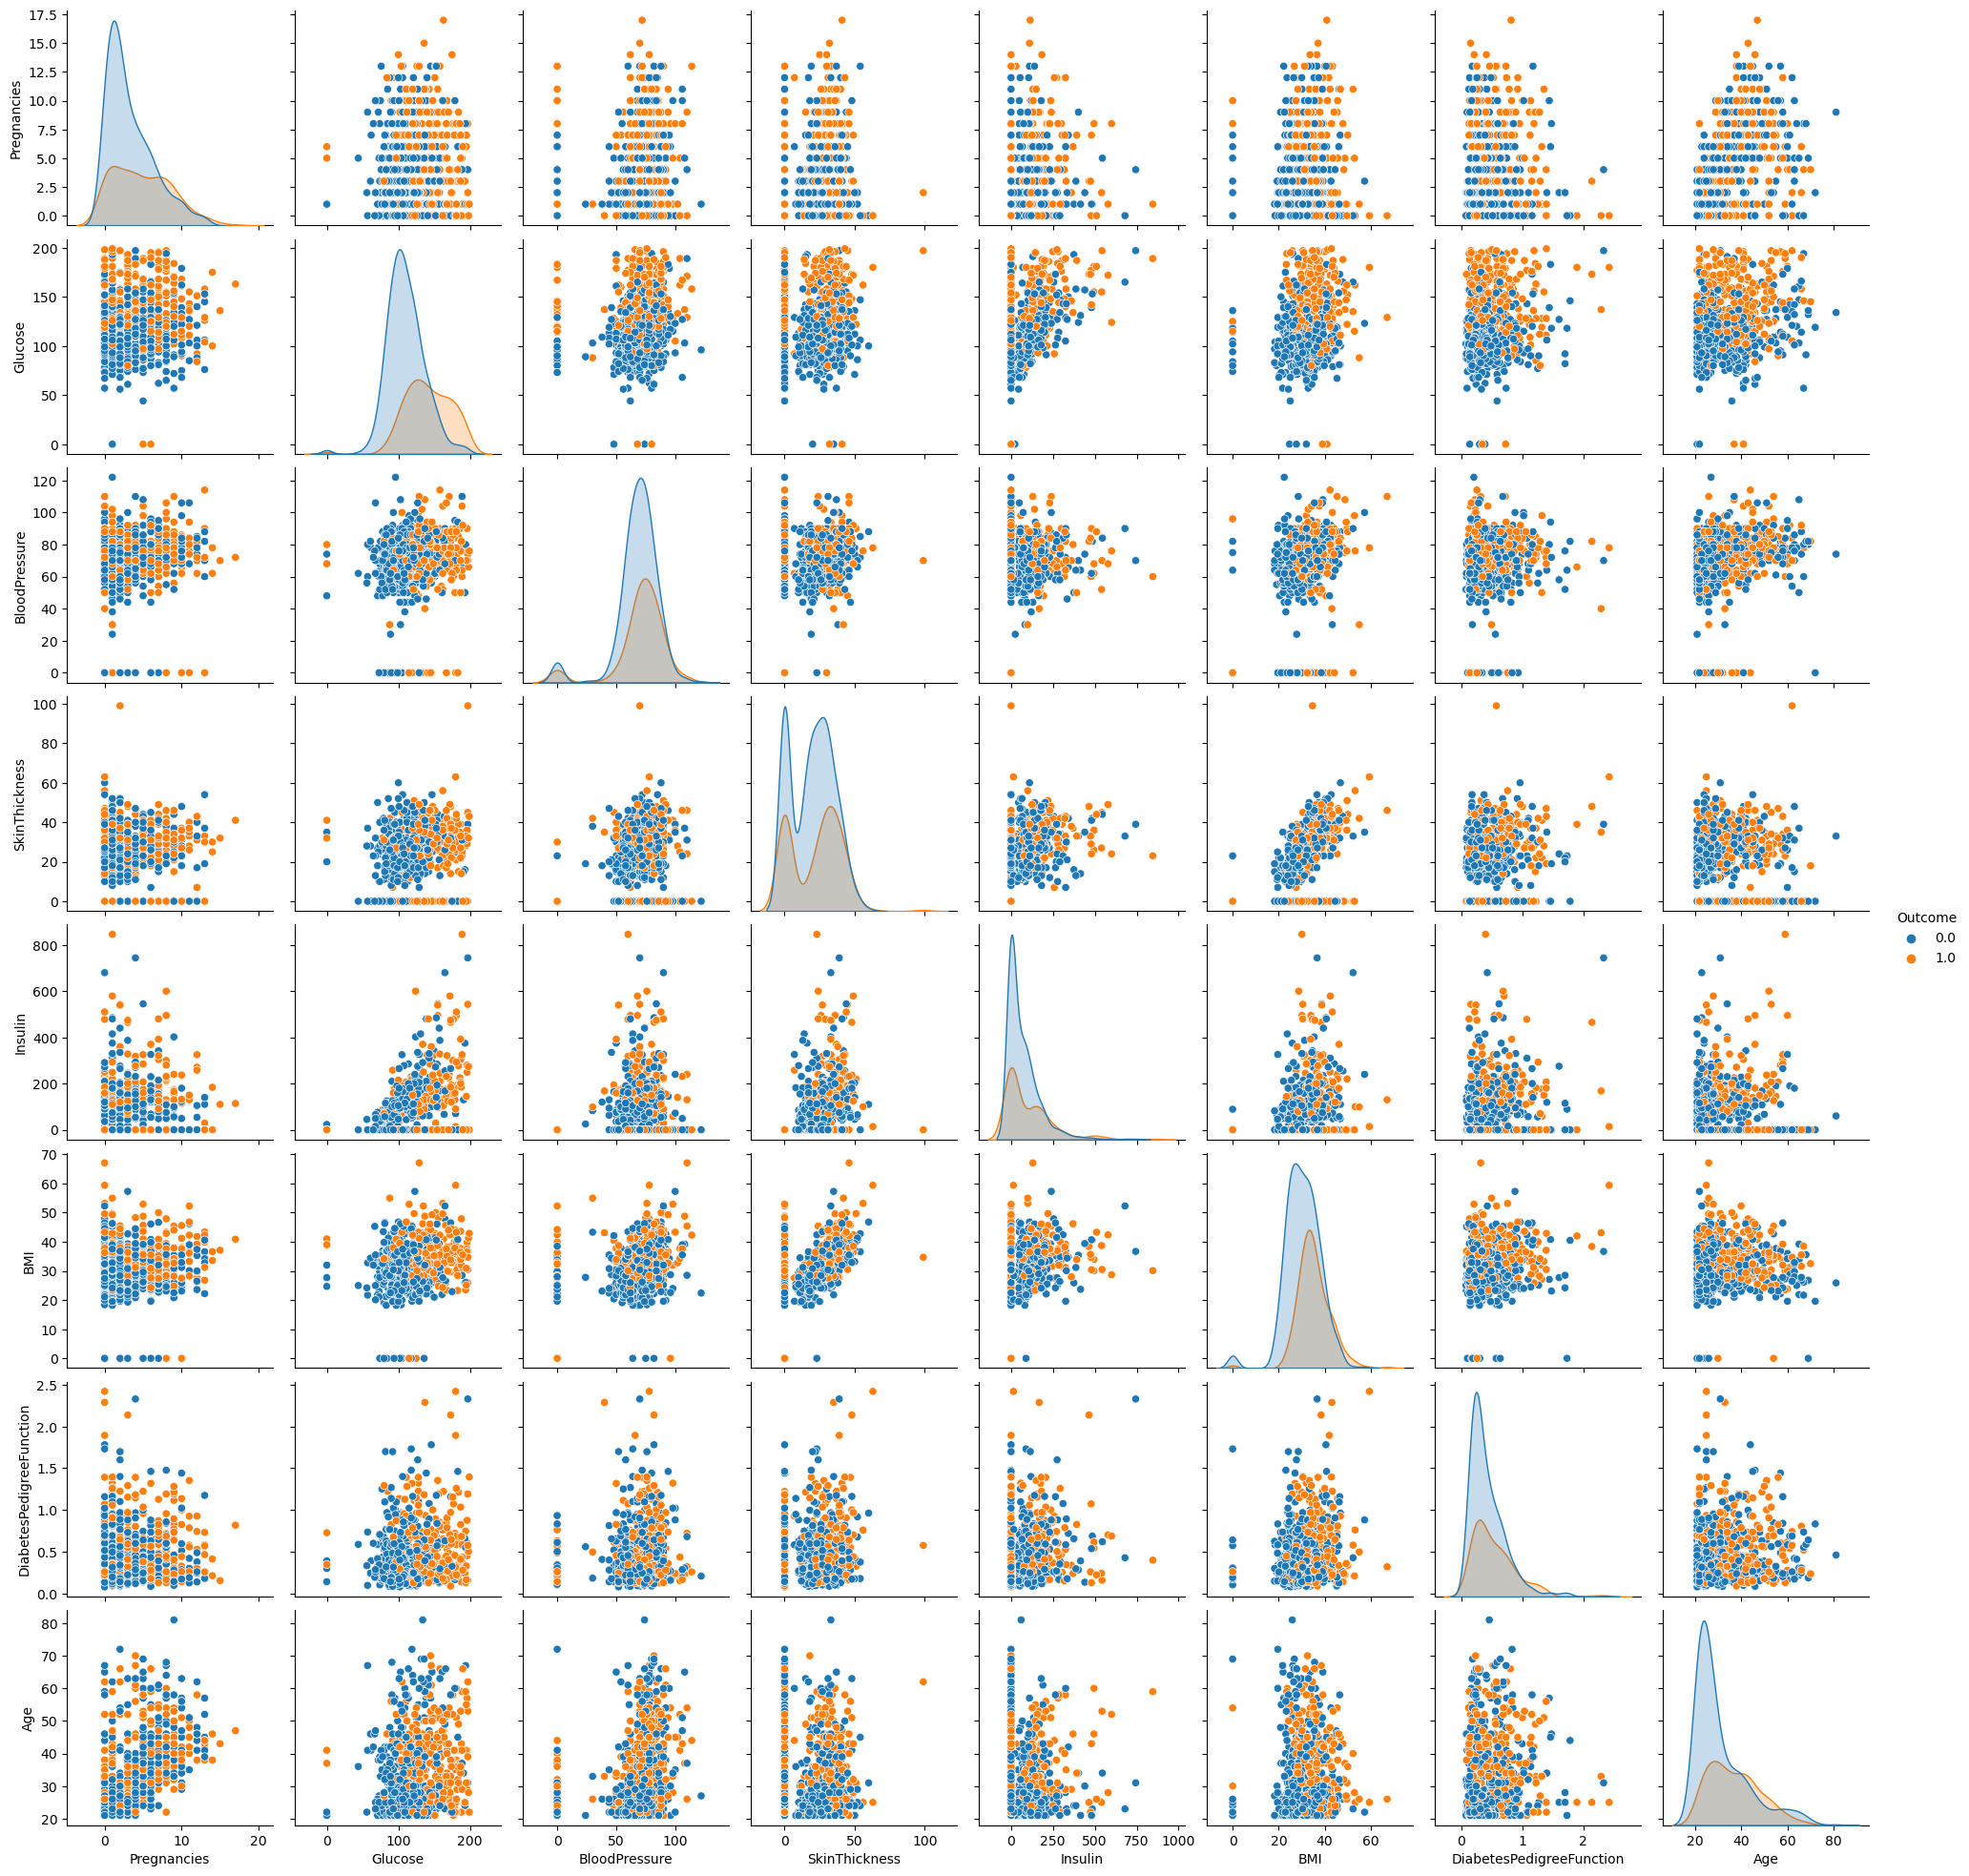

In [82]:
# Data Visualization
# Select only numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
subset = data[numeric_columns]
sns.pairplot(subset, hue='Outcome')
plt.show()

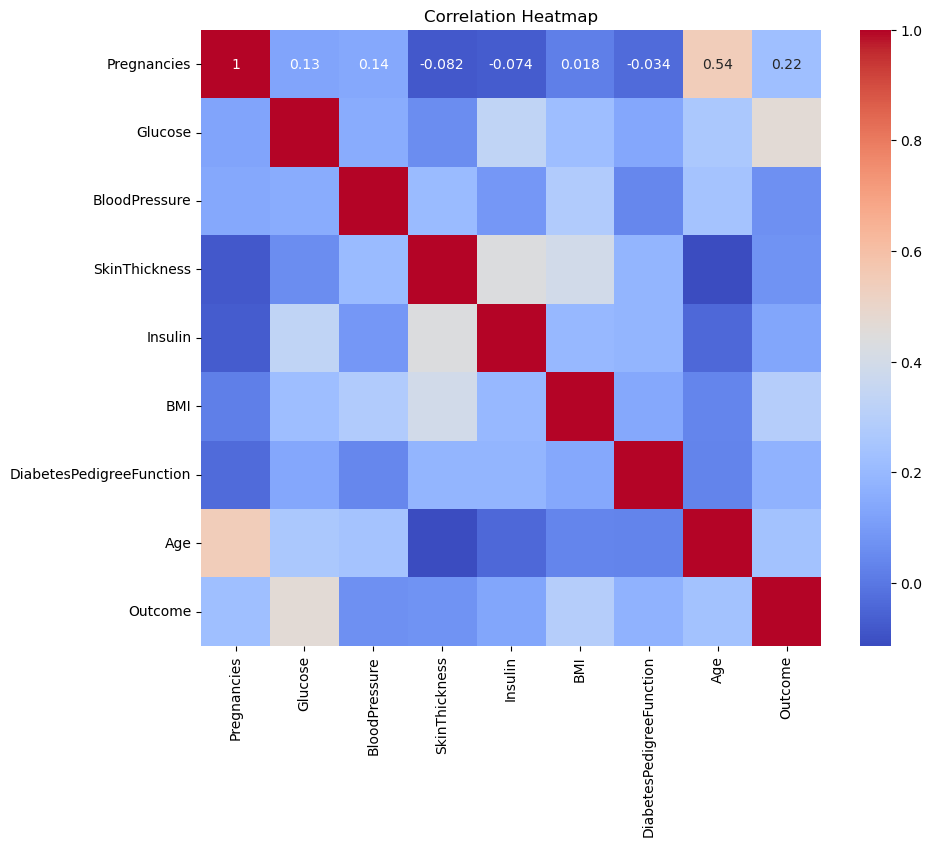

In [83]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [84]:
# Data Preprocessing
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [85]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [87]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7532
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        99
         1.0       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [94]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
print(f"\nDecision Tree Accuracy: {dtree_accuracy:.4f}")
print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))


Decision Tree Accuracy: 0.7468
[[75 24]
 [15 40]]
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79        99
         1.0       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [96]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
print(f"\nRandom Forest Accuracy: {rfc_accuracy:.4f}")
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))


Random Forest Accuracy: 0.7208
[[77 22]
 [21 34]]
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78        99
         1.0       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



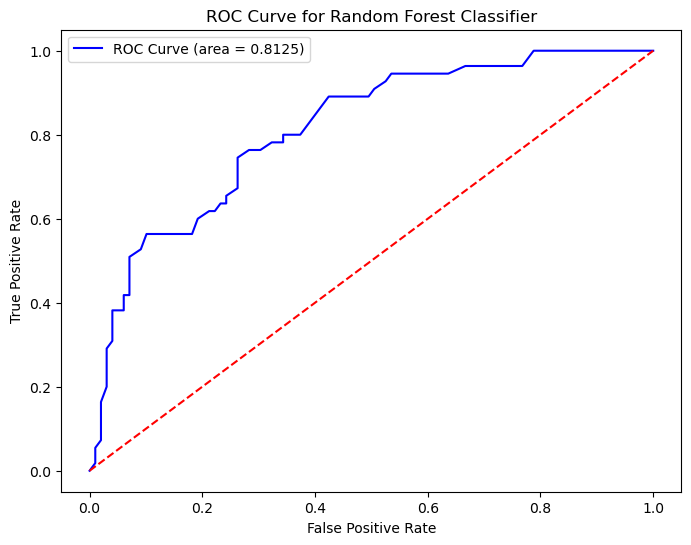

In [98]:
# ROC-AUC Curve for Random Forest
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()


In [100]:
# Conclusion
print(f"\nSummary of Model Performance:")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dtree_accuracy:.4f}")
print(f"Random Forest Accuracy: {rfc_accuracy:.4f}")


Summary of Model Performance:
Logistic Regression Accuracy: 0.7532
Decision Tree Accuracy: 0.7468
Random Forest Accuracy: 0.7208
